In [15]:
import pandas as pd

In [17]:
file_path = 'TSLA.csv'

In [20]:
data = pd.read_csv(file_path)

data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


(None,
          Date   Open   High    Low  Close  Adj Close    Volume
 0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
 1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
 2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
 3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
 4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500)

In [21]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Setting the date as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# We will predict the 'Close' price
opening_prices = data[['Open']].values

# Normalize the data for the LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# We'll use 60 previous days to predict the next day's price
sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape



NameError: name 'closing_prices' is not defined

In [23]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare your data as shown earlier
closing_prices = data[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Define sequence length and create sequences
sequence_length = 60
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [25]:
pip install tensorflow

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [31]:
model = Sequential()

In [36]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - loss: 2.8706e-04 - val_loss: 0.0376
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.8372e-05 - val_loss: 0.0337
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 5.0127e-05 - val_loss: 0.0291
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.5098e-05 - val_loss: 0.0266
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 4.0878e-05 - val_loss: 0.0254
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 3.7989e-05 - val_loss: 0.0255
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 3.8229e-05 - val_loss: 0.0267
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.6601e-05 - val_loss: 0.0249
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 3.4637e-05 - val_loss: 0.0233
Epoch 10/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 3.4507e-05 - val_loss: 0.0260


In [34]:
predicted_prices = model.predict(X_test)
predicted_prices = predicted_prices.reshape(-1, 1)  # Reshape to 2D array
predicted_prices = scaler.inverse_transform(predicted_prices)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


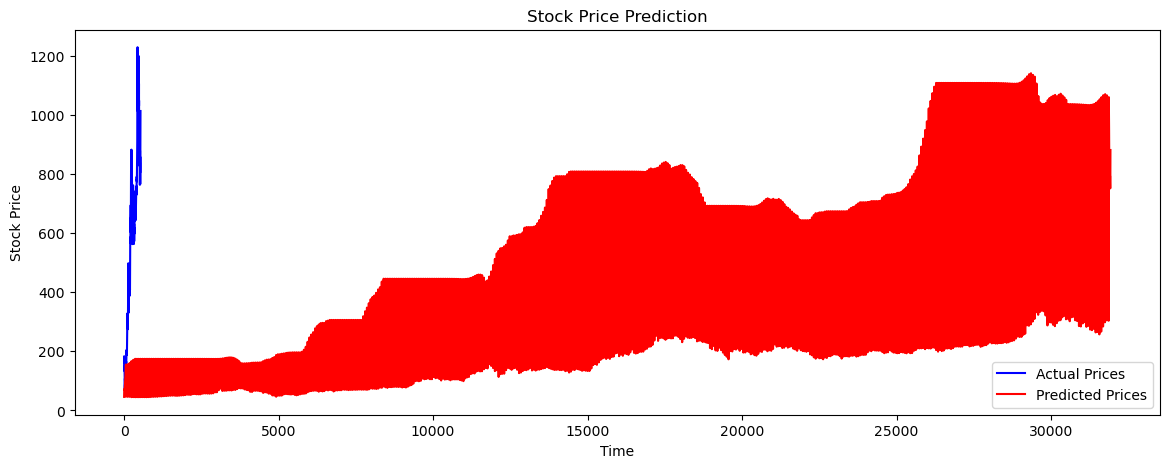

In [40]:
import matplotlib.pyplot as plt

y_test_actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()